# K-Means
#### K-Means adalah algoritma untuk pengelompokkan. Algoritma ini membagun kelompok dari data yang kita berikan. Kelompok yang dibangun, umumnya menghasilkan kelompok dengan hubungan kedekatan pada masing-masing data.

Bayangkan, anda adalah seorang pekerja pada bagian administrasi di sekolah XYZ. Anda tahu adanya banyak murid di sekolah tersebut dengan latar belakang berbeda. Untuk memenuhi kebutuhan administrasi sekolah, anda ditugaskan untuk menilai jarak tempuh murid ke sekolah di ruang kelas A. Andapun mulai mengelompokkan dan anda memperoleh hasil sebagai berikut:
1. Ada 25 murid yang tinggal dengan jarak kurang dari 1 km (terhitung dari jarak sekolah ke rumah).
2. Ada 4 murid yang tinggal dengan jarak lebih dari 1 km tetapi kurang dari 2 km (terhitung dari jarak sekolah ke rumah).
3. Ada 10 murid yang tinggal dengan jarak lebih 2 km (terhitung dari jarak sekolah ke rumah).

Anda berhasil mengelompokkan murid tersebut kedalam 3 kategori yaitu:
1. Jarak < 1 km
2. 1 km > jarak < 2 km
3. Jarak > 2 km

Kelompok inilah yang disebut dengan clustering.

Proses clustering adalah proses kita mengelompokkan berdasarkan data-data yang telah diperoleh. Pada ruangan kelas kita dapat mengelompokkan murid berdasarkan jenis kelamin (perempuan atau laki-laki), berat badan (di atas 50 kg atau di bawah 50kg), mata (menggunakan kacamata atau tidak menggunakan kacamata), dan masih banyak lagi.

Tetapi pernahkah anda berpikir butuh berapa lama untuk mengelompokkan data yang apabila datanya sangat banyak seperti syarat penerimaan beasiswa (yang harus memenuhi point A, B, C, D, E untuk siswa tersebut memperoleh beasiswa) ataupun data lainnya.

Algoritma K-means memberikan solusi atas permasalahan tersebut. Algoritma ini menggunakan rumus matematika Euclidean Distance untuk menentukan kelompok yang menurut perhitungan tersebut terdekat.Adapun langkah-langkah tahapan clustering dengan K-Means adalah sebagai berikut!

##### Rumus KMeans yang digunakan adalah rumus euclidean distance

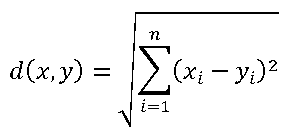

##### contoh perhitungannya adalah sebagai berikut

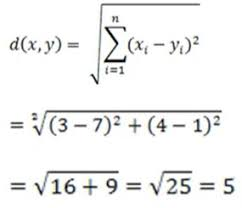

# 1. Penggunaan Data

In [1]:
# library pandas untuk menampilkan data dan mengelolah data dalam bentuk tabel
import pandas as pd

try:
    df1 = pd.read_csv("Sekolah.csv", sep=";")
    print("Data berhasil dibaca")
    display(df1)
except FileNotFoundError:
    print("Data tidak berhasil dibaca")

Data berhasil dibaca


,Nim,Akuntansi,Pajak,Komputer,Bahasa,Matematika,Sejarah
0,2201,100,98,94,80,90,60
1,2202,88,72,75,72,75,78
2,2203,81,94,91,93,94,81
3,2204,60,50,70,72,60,55
4,2205,81,99,96,83,85,98
5,2206,78,82,92,91,96,83
6,2207,88,93,99,94,80,97
7,2208,50,66,55,40,70,80
8,2209,70,70,80,70,70,72
9,2210,91,76,75,95,87,87


In [2]:
# data nim tidak diperlukan sehingga kita membuat variabel "df2" yang hanya menampung data nilai
df2 = df1[["Akuntansi", "Pajak", "Komputer", "Bahasa", "Matematika", "Sejarah"]]

print(df2)

    Akuntansi  Pajak  Komputer  Bahasa  Matematika  Sejarah
0         100     98        94      80          90       60
1          88     72        75      72          75       78
2          81     94        91      93          94       81
3          60     50        70      72          60       55
4          81     99        96      83          85       98
5          78     82        92      91          96       83
6          88     93        99      94          80       97
7          50     66        55      40          70       80
8          70     70        80      70          70       72
9          91     76        75      95          87       87
10         94     91       100      98          91       80
11         60     65        72      60          55       75
12         75     75        72      72          75       75
13         81     70        98      90          77       75
14         99     85        86      90          86       84
15         60     55        77      69  

# 2. Melakukan algoritma Clustering K-Means

In [3]:
# library sklearn.cluster adalah library untuk melakukan cluster
import sklearn.cluster as cls

# buat rumus KMeans dengan library sklearn.cluster yang telah kita inisialisasi sendengan cls. sehingga kita membuat cls.KMeans
# kita perlu menentukan berapa titik centroid. Kita dapat menggunakan 2 yaitu lulus dan tidak lulus. Sehingga kita membuat cls.KMeans(n_cluster=2)
# algorithm dapat dibuang, tetapi kita dapat menambahkan algorithm berupa 'elkan'. Algoritma elkan membantu mempercepat optimasi proses KMeans dengan batas bawah dan atas.
# tampung rumus yang telah kita buat kedalam variabel "proseskmeans". sehingga rumus yang jadi adalah sebagai berikut:
proseskmeans = cls.KMeans(n_clusters=2, algorithm='elkan')

# Ini adalah hasil parameter dari proseskmeans sebelumnya
print(proseskmeans.get_params())

{'algorithm': 'elkan', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 2, 'n_init': 'auto', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


In [4]:
# anggaplah sekarang variabel "proseskmeans" telah pintar dalam hal kmeans dengan titik centroid 2.
# selanjutnya kita gunakan "proseskmeans" tersebut untuk melatih data yang telah kita siapkan (df2) dengan menggunakan fit. Sehingga proses pelatihan adalah sebagai berikut.
proseskmeans.fit(df2)

KMeans(algorithm='elkan', n_clusters=2)

##### Sebelum lebih lanjut, pernahkah kamu berpikir berapa banyak iterasi(perulangan) pada kmeans ini dilakukan hingga mencapai konvergensi saat melatih model?

In [5]:
# Kita dapat mengetahui berapa iterasi yang dilakukan dengan menggunakan "n_iter_" sebagai berikut
banyakiterasi = proseskmeans.n_iter_

print(f"Banyak iterasi yang harus dilakukan untuk mencapai konvergensi adalah: {banyakiterasi}")

Banyak iterasi yang harus dilakukan untuk mencapai konvergensi adalah: 5


##### Lanjutkan, sekarang kamu perlu mengetahui titik centroidnya!

In [6]:
# proses sebelumnya kita telah melatih data df2 dengan algoritma kmeans yang telah kita tampung di "proseskmeans". 
# Untuk melihat setiap titik cluster anda dapat menggunakan ".cluster_centers_". Adapun hasil adalah sebagai berikut:
centroids = proseskmeans.cluster_centers_
print(centroids)

[[87.59259259 83.85185185 88.         90.07407407 87.33333333 85.96296296]
 [56.4        64.06666667 67.8        60.46666667 62.8        65.13333333]]


##### Dari data tersebut dapat diketahui:
1. Centroid 0 = 56.4 , 64.06666667 , 67.8 , 60.46666667 , 62.8 , 65.13333333
2. Centroid 1 = 87.59259259 , 83.85185185 , 88 , 90.07407407 , 87.33333333 , 85.96296296

# 3. Hasil clustering K-Means

In [7]:
# Anda dapat membuat variabel "label" untuk menampung centroid dari setiap data. 
# dengan proseskmeans yang telah anda buat, tambahkan ".labels_" untuk melihat data di titik 0 atau 1
labels = proseskmeans.labels_
print(labels)

[0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0
 0 0 1 0 0]


##### Data sudah jadi, berupa [1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1]. Tetapi hasil berupa 1 dan 0. Mari kita buat lebih jelas seorang murid lulus atau tidak.

In [8]:
# kita buat inisialisasi 1 untuk "lulus" dan 0 untuk "gagal". Kita lakukan pengecekkan dan simpan dalam array "ket=[]" dengan metode append.
ket = []
i = 0;
for i in labels:
    if i == 1:
        keterangan = "lulus";
    else:
        keterangan = "gagal";
    ket.append(keterangan);
    
print(ket)

['gagal', 'gagal', 'gagal', 'lulus', 'gagal', 'gagal', 'gagal', 'lulus', 'lulus', 'gagal', 'gagal', 'lulus', 'lulus', 'gagal', 'gagal', 'lulus', 'lulus', 'lulus', 'lulus', 'gagal', 'gagal', 'lulus', 'gagal', 'lulus', 'gagal', 'gagal', 'gagal', 'gagal', 'lulus', 'gagal', 'gagal', 'gagal', 'gagal', 'lulus', 'lulus', 'gagal', 'gagal', 'gagal', 'gagal', 'lulus', 'gagal', 'gagal']


##### Data sudah lebih jelas dengan hasil lulus dan gagal. Mari kita masukkan data ke dalam tabel dan lihat hasilnya!

In [9]:
df1['keterangan'] = ket
display(df1)

,Nim,Akuntansi,Pajak,Komputer,Bahasa,Matematika,Sejarah,keterangan
0,2201,100,98,94,80,90,60,gagal
1,2202,88,72,75,72,75,78,gagal
2,2203,81,94,91,93,94,81,gagal
3,2204,60,50,70,72,60,55,lulus
4,2205,81,99,96,83,85,98,gagal
5,2206,78,82,92,91,96,83,gagal
6,2207,88,93,99,94,80,97,gagal
7,2208,50,66,55,40,70,80,lulus
8,2209,70,70,80,70,70,72,lulus
9,2210,91,76,75,95,87,87,gagal


##### Jika dilihat dengan seksama, hasil yang muncul tidaklah baik. Seorang murid mendapat nilai yang baik, tetapi hasil akhir menunjukkan murid tersebut tidak lulus. Bagaimana jika dibuat hasil yang lebih baik?

##### Sebelum itu mari buat data tersebut ke file excel untuk disimpan. Sebelum itu, silahkan lalukan instal module dengan pip install openpyxl.

# 5. Simpan file dalam 'xlsx'

In [14]:
data = str(input("Apakah anda ingin save data? (Y/T) : "))
if data.lower() == "y":
    nama = input("masukkan nama file = ")
    alamat = f'{nama}.xlsx'
    df1.to_excel(alamat, index=False)
    print("Berhasil disimpan!")
else:
    print("Data tidak disimpan!")

Apakah anda ingin save data? (Y/T) : t
Data tidak disimpan!
